## Assignment 03 - Object counting on a conveyor belt
### Name : Shivanka Priyashan
### Index : 190476V

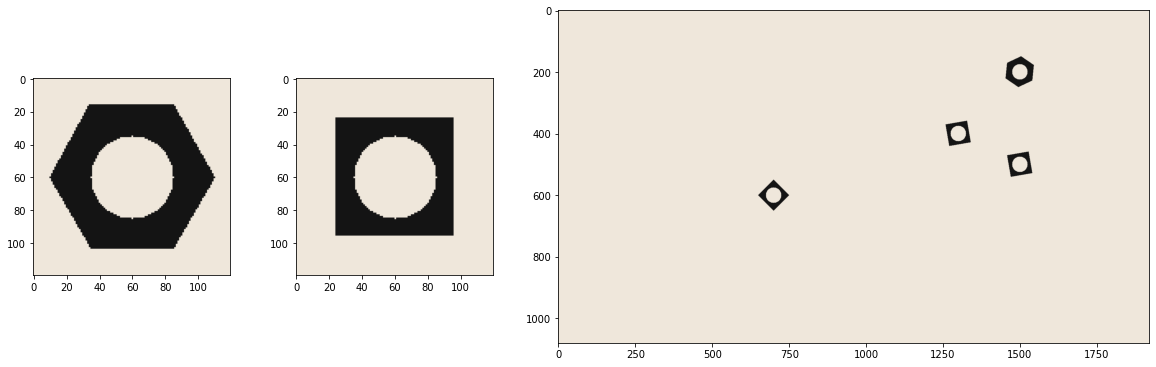

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(20,10),gridspec_kw={'width_ratios': [1,1, 3]})
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

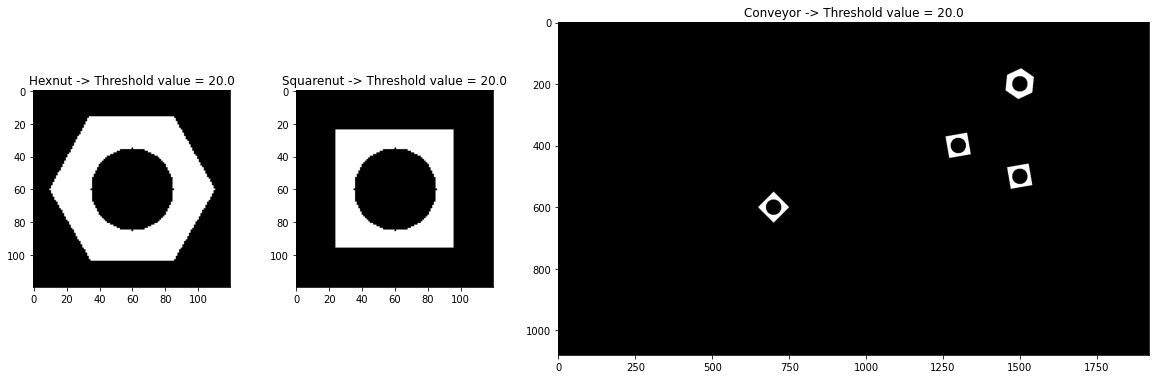

In [3]:
hexnut_gray = cv.cvtColor(hexnut_template,cv.COLOR_RGB2GRAY)
squarenut_gray = cv.cvtColor(squarenut_template,cv.COLOR_RGB2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100,cv.COLOR_RGB2GRAY)

hex_ret, hex_thresh = cv.threshold(hexnut_gray,0,255,cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
square_ret, square_thresh = cv.threshold(squarenut_gray,0,255,cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
conveyor_ret, conveyor_thresh = cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

fig, ax = plt.subplots(1,3,figsize=(20,10),gridspec_kw={'width_ratios': [1,1, 3]})
ax[0].imshow(hex_thresh,cmap='gray')
ax[0].set_title("Hexnut -> Threshold value = {}".format(hex_ret))
ax[1].imshow(square_thresh,cmap='gray')
ax[1].set_title("Squarenut -> Threshold value = {}".format(square_ret))
ax[2].imshow(conveyor_thresh,cmap='gray')
ax[2].set_title("Conveyor -> Threshold value = {}".format(conveyor_ret))

plt.show()


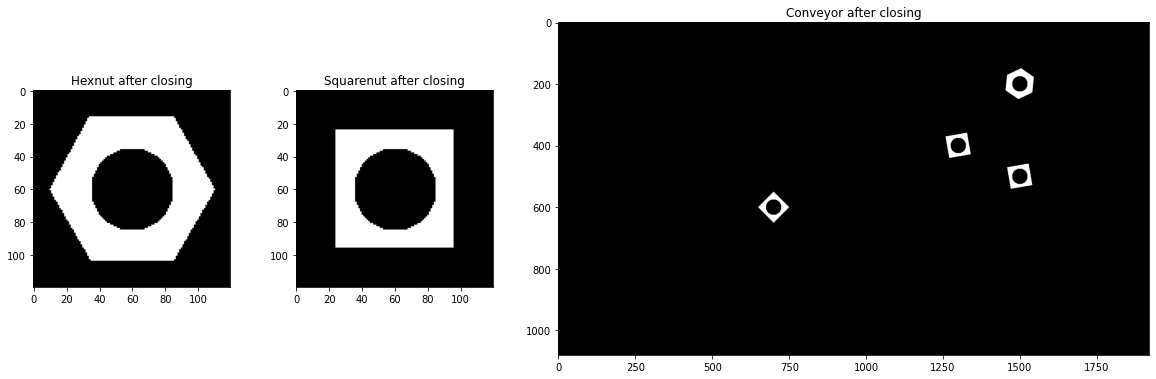

In [4]:
kernel = np.ones((3,3),np.uint8)

hex_closing = cv.morphologyEx(hex_thresh,cv.MORPH_CLOSE,kernel)
square_closing = cv.morphologyEx(square_thresh,cv.MORPH_CLOSE,kernel)
conveyor_closing = cv.morphologyEx(conveyor_thresh,cv.MORPH_CLOSE,kernel)

fig, ax = plt.subplots(1,3,figsize=(20,20),gridspec_kw={'width_ratios': [1,1, 3]})
ax[0].imshow(hex_closing,cmap='gray')
ax[0].set_title("Hexnut after closing")
ax[1].imshow(square_closing,cmap='gray')
ax[1].set_title("Squarenut after closing")
ax[2].imshow(conveyor_closing,cmap='gray')
ax[2].set_title("Conveyor after closing")

plt.show()

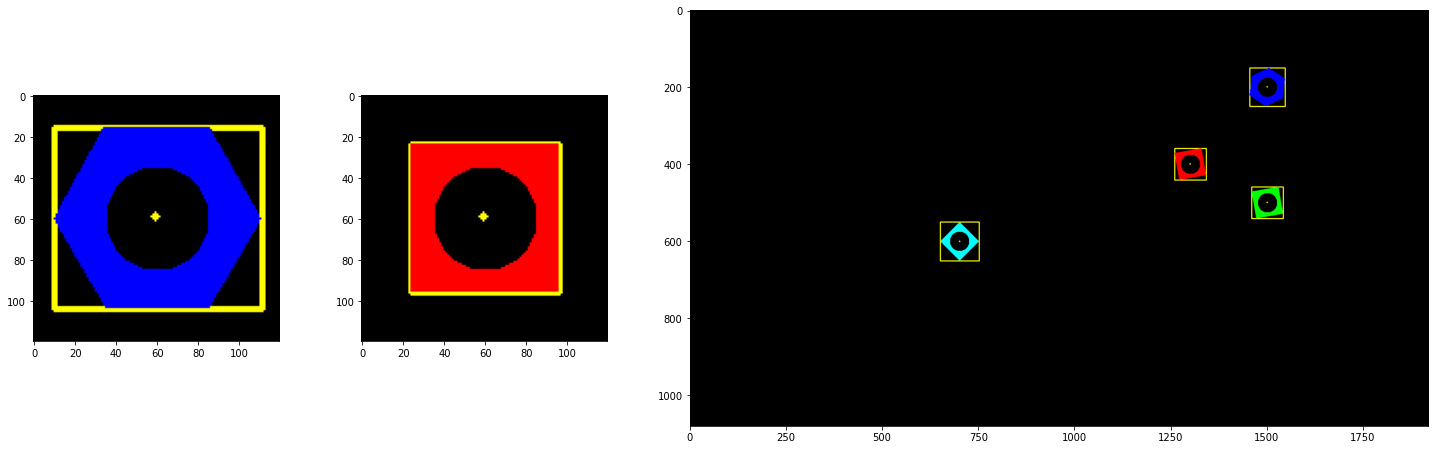

In [17]:
#Co
fig, ax  = plt.subplots(1,3, figsize=(25,10),gridspec_kw={'width_ratios': [1,1, 3]})

images = [hex_closing, square_closing, conveyor_closing]
img_names = ["hexnut_template", "squarenut_template","conveyor_f100"]
templates = []
colors = [(0,0,255),(255,0,0),(0,0,255),(255,0,0),(0,255,0),(0,255,255)]
j = 0

for k in range(len(images)):
    numLabels, labels, stats, centroids = cv.connectedComponentsWithStats(images[k],4,cv.CV_32S)
    output = cv.cvtColor(images[k].copy(),cv.COLOR_GRAY2RGB)
    data = []
    for i in range(1,numLabels):
        x = stats[i,cv.CC_STAT_LEFT]
        y = stats[i,cv.CC_STAT_TOP]
        w = stats[i,cv.CC_STAT_WIDTH]
        h = stats[i,cv.CC_STAT_HEIGHT]
        area = stats[i,cv.CC_STAT_AREA]
        (cX,cY) = centroids[i]

        data.append([img_names[k],numLabels,x,y,w,h,area,(cX,cY)])

        mask = (labels == i).astype("uint8")*255

        cv.rectangle(output, (x, y), (x + w, y + h), (255, 255, 0), 2)
        cv.circle(output, (int(cX), int(cY)), 2, (255, 255, 0), -1)

        output[:,:,:][mask==255] = colors[j]

        j += 1

    templates.append(data)
    ax[k].imshow(output)

In [18]:
for template in templates:
        print("{} -> connected components : {}".format(template[0][0],template[0][1]-1)) # Minus the background
        k = 1
        for component in template:
                print(f"Component {k} -> x={component[2]} y={component[3]} w={component[4]} h={component[5]} area={component[6]} centroid={component[7]}")
                k+=1
        print()

hexnut_template -> connected components : 1
Component 1 -> x=10 y=16 w=101 h=88 area=4728 centroid=(59.83375634517766, 59.22356175972927)

squarenut_template -> connected components : 1
Component 1 -> x=24 y=24 w=72 h=72 area=3227 centroid=(59.196777192438795, 59.196777192438795)

conveyor_f100 -> connected components : 4
Component 1 -> x=1454 y=150 w=92 h=100 area=4636 centroid=(1499.2420189818808, 199.28515962036238)
Component 2 -> x=1259 y=359 w=82 h=82 area=3087 centroid=(1299.1830255911889, 399.1830255911889)
Component 3 -> x=1459 y=459 w=82 h=82 area=3087 centroid=(1499.1830255911889, 499.1830255911889)
Component 4 -> x=650 y=550 w=101 h=101 area=3144 centroid=(700.0, 600.0)



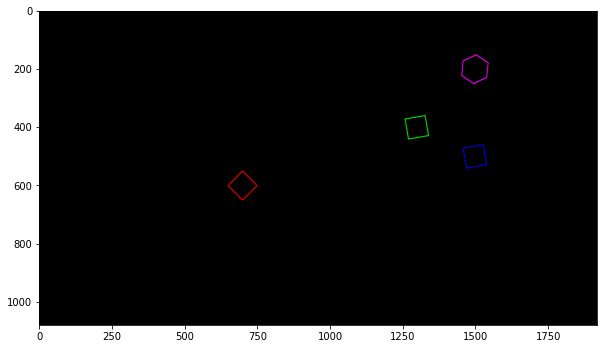

In [7]:
contours, hierarchy = cv.findContours(conveyor_closing,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
rectangle = np.zeros(conveyor_closing.shape,dtype="uint8")
output = cv.cvtColor(rectangle,cv.COLOR_GRAY2BGR)

cv.drawContours(output, contours,0,(0,0,255),2)
cv.drawContours(output, contours,1,(255,0,0),2)
cv.drawContours(output, contours,2,(0,255,0),2)
cv.drawContours(output, contours,3,(255,0,255),2)

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(cv.cvtColor(output,cv.COLOR_BGR2RGB))
plt.show()

#### Detecting objects on a synthetic conveyor

In [8]:
import cv2 as cv

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


1


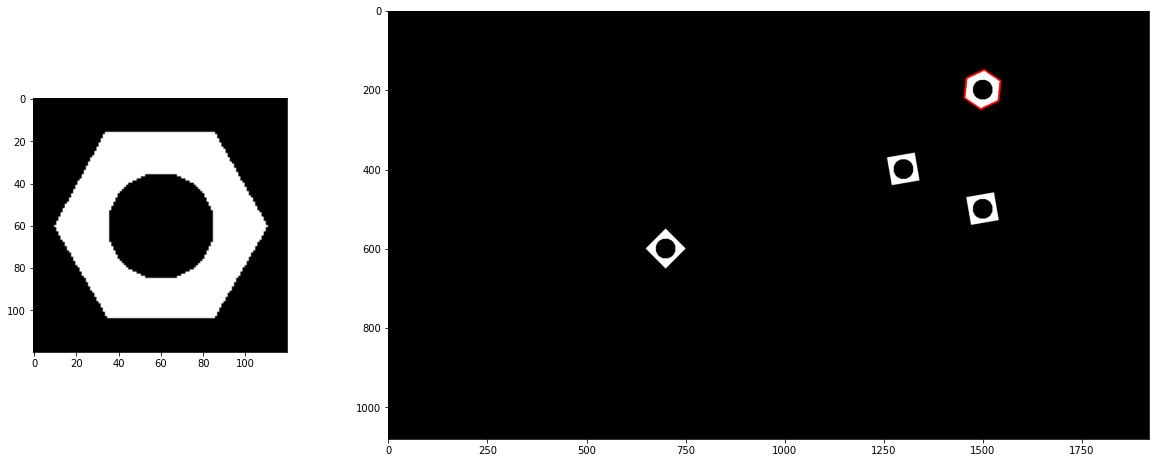

In [9]:
img1 = hex_closing.copy()
img2 = square_closing.copy()
img3 = conveyor_closing.copy()
img3_bgr = cv.cvtColor(img3,cv.COLOR_GRAY2BGR)

hex_contours1, hierarchy1 = cv.findContours(img1,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
square_contours1, hierarchy1 = cv.findContours(img2,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)

numLabels, labels, stats, centroids = cv.connectedComponentsWithStats(conveyor_closing,4,cv.CV_32S)
count = 0

for i in range(1,numLabels):
    x = stats[i,cv.CC_STAT_LEFT]
    y = stats[i,cv.CC_STAT_TOP]
    w = stats[i,cv.CC_STAT_WIDTH]
    h = stats[i,cv.CC_STAT_HEIGHT]
    area = stats[i,cv.CC_STAT_AREA]
    (cX,cY) = centroids[i]

    mask = (labels == i).astype("uint8")*255

    contours2, hierarchy2 = cv.findContours(mask,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)

    #Compare the contours of hexnut template and mask of each connected component
    ret = cv.matchShapes(hex_contours1[0],contours2[0],1,0.0)

    if ret < 0.001:  #Lower the result better the similarity
        count += 1
        cv.drawContours(img3_bgr,contours2,-1,(0,0,255),4)

print(count)
fig, ax = plt.subplots(1,2,figsize=(20,10),gridspec_kw={'width_ratios': [1,3]})
ax[0].imshow(cv.cvtColor(hex_closing,cv.COLOR_GRAY2RGB))
ax[1].imshow(cv.cvtColor(img3_bgr,cv.COLOR_BGR2RGB))

plt.show()

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hex_contours1, hierarchy1 = cv.findContours(img1,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')

f = 0
frame = []    
total_matches = 0
frame_array = []
initalizer = 0
initial_cord = []

while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    #matching hexnuts in the frame
    frame_gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
    ret_frame,frame_thresh = cv.threshold(frame_gray ,0,255,cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    
    kernel = np.ones((3,3),np.uint8)
    frame_closed = cv.morphologyEx(frame_thresh, cv.MORPH_CLOSE, kernel)

    #connected component analysis
    connectivity = 4  
    numLabels, labels, stats, centroids = cv.connectedComponentsWithStats(frame_closed, connectivity, cv.CV_32S)

    matches = 0
    matched_contours = []

    for i in range(1, numLabels):
        x = stats[i, cv.CC_STAT_LEFT]
        y = stats[i, cv.CC_STAT_TOP]
        w = stats[i, cv.CC_STAT_WIDTH]
        h = stats[i, cv.CC_STAT_HEIGHT]
        area = stats[i, cv.CC_STAT_AREA]
        (cX, cY) = centroids[i]
        
        componentMask = (labels == i).astype("uint8") * 255
        contours, hierarchy = cv.findContours(componentMask , cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

        image_to_be_matched = hex_contours1[0] 
    
        for i in contours:
            ret = cv.matchShapes(i, image_to_be_matched ,1,0.0)
            if (ret < 0.001 and area > 4600): 
                matches += 1
                
                matched_contours.append(i)

                if(initalizer == 0):
                    initial_cord.append([cX,cY])
                    initalizer += 1

                if (cX < initial_cord[0][0]+3 and cX > initial_cord[0][0]-3):
                    total_matches += 1

    frame_copy = frame_closed.copy()
    frame_copy = cv.cvtColor(frame_copy, cv.COLOR_GRAY2BGR)
    for i in range(len(matched_contours)):
        cv.drawContours(frame, matched_contours[i], -1, (0,0,255) ,thickness=3, lineType=cv.LINE_AA)

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 50), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv.LINE_AA)
    cv.putText(frame, "Matches in current frame:"+ str(matches) , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv.LINE_AA)
    cv.putText(frame, "Total matches:"+ str(total_matches) , (100, 150), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv.LINE_AA)
    frame_array.append(frame)
    
cap.release()

shape = (1080, 1920, 3)

out = cv.VideoWriter('./conveyor_result_190476V.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
